In [1]:
import numpy as np

import kernel_rl
import torch
from matplotlib import pyplot as plt
import pandas as pd
import importlib

In [2]:
subject_trials = "../saved_data/all_Yuri.csv"
data = pd.read_csv(subject_trials, sep="\t")

In [3]:
print(len(data))
data.head()

576081


,year,month,day,s1,s2,s3,s4,c1,c2,c3,c4,reward,choice_idx,choice_x,choice_y,react_time
0,2021,7,7,28,17,5,25,30,28,13,28,2,0,112,350,3491
1,2021,7,7,16,26,7,23,34,30,7,0,2,0,182,391,887443
2,2021,7,7,33,21,32,10,1,35,35,21,1,1,118,853,51459
3,2021,7,7,4,25,20,17,30,26,22,33,2,3,557,856,3850
4,2021,7,7,17,25,18,14,16,27,25,30,1,3,592,852,2292


In [26]:
kernel_rl = importlib.reload(kernel_rl)
model = kernel_rl.KernelRL(resolution=72, temporal_window=10)
state_space = model.fit(data.head(500), epochs=50)

Epoch 0
trial 0
trial 1
trial 2
trial 3
trial 4
trial 5
trial 6
trial 7
trial 8
trial 9
trial 10
trial 11
trial 12
trial 13
trial 14
trial 15
trial 16
trial 17
trial 18
trial 19
trial 20
trial 21
trial 22
trial 23
trial 24
trial 25
trial 26
trial 27
trial 28
trial 29
trial 30
trial 31
trial 32
trial 33
trial 34
trial 35
trial 36
trial 37
trial 38
trial 39
trial 40
trial 41
trial 42
trial 43
trial 44
trial 45
trial 46
trial 47
trial 48
trial 49
trial 50
trial 51
trial 52
trial 53
trial 54
trial 55
trial 56
trial 57
trial 58
trial 59
trial 60
trial 61
trial 62
trial 63
trial 64
trial 65
trial 66
trial 67
trial 68
trial 69
trial 70
trial 71
trial 72
trial 73
trial 74
trial 75
trial 76
trial 77
trial 78
trial 79
trial 80
trial 81
trial 82
trial 83
trial 84
trial 85
trial 86
trial 87
trial 88
trial 89
trial 90
trial 91
trial 92
trial 93
trial 94
trial 95
trial 96
trial 97
trial 98
trial 99
trial 100
trial 101
trial 102
trial 103
trial 104
trial 105
trial 106
trial 107
trial 108
trial 109
tr

tensor(5.4170e-09, grad_fn=<MinBackward1>) tensor(0.0040, grad_fn=<MaxBackward1>)


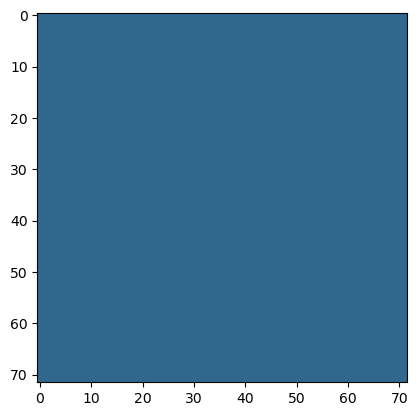

In [32]:
print(torch.min(state_space[499]), torch.max(state_space[499]))
plt.imshow(state_space[499].detach().numpy(), vmin=-1.0, vmax=2.0)

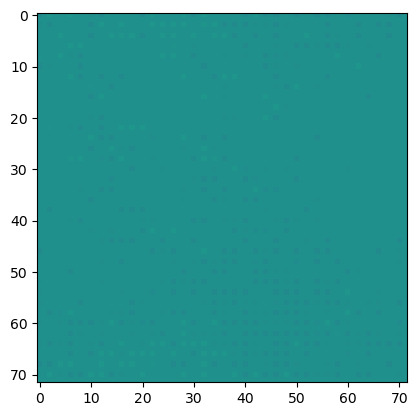

In [30]:
plt.imshow(model.init_prob.detach().numpy(), vmax=1.0, vmin=-1.0)